<h1 align="center">Volume 1: Facial Recognition.</h1>

    <Name> Trevor Wai
    <Class> Section 2
    <Date> 11/14/22

In [57]:
import os
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
import scipy.linalg as la

### Helper Functions

In [58]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

### Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [59]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    #Reshapes and displays the image
    new_image = np.reshape(image, (m, n))
    plt.imshow(new_image, cmap='gray')
    plt.axis('off')

C:\Users\tmntn\AppData\Local\Temp\ipykernel_10636\1106870313.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))


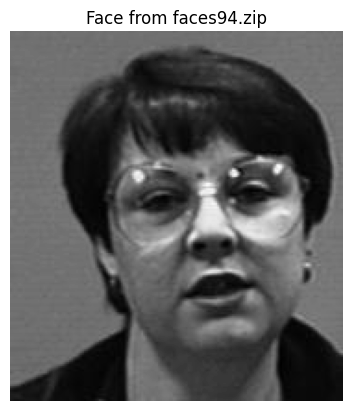

In [60]:
#Constructs F
F = get_faces()

#Displays one image from F
show(F[:,0])
plt.title('Face from faces94.zip')
plt.show()


In [88]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        #Initialize F, mu, Fbar, and U
        self.F = get_faces(path)
        self.mu = np.sum(self.F, axis=1) / self.F.shape[1]
        self.Fbar = self.F - self.mu.reshape((self.F.shape[0], 1))
        self.U = la.svd(self.Fbar, full_matrices=False)[0]
        

    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        #Project a face vector onto the subspaces spanned by the first s eigenfaces
        return self.U[:,:s].T @ A


    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        #Computes ghat and Fhat then finds the best matching face in the database
        ghat = np.reshape(self.project(g, s), (s,1))
        Fhat = self.project(self.F, s)
        return np.argmin(la.norm(Fhat - ghat, axis=0))

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        #Finds the index of the closest match and plots the faces
        index = self.find_nearest(image, s)
        plt.subplot(121)
        show(image, m, n)
        plt.subplot(122)
        show(self.F[:,index])
        plt.show()
        

### Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

In [89]:
#Initialize a FacialRec object
face = FacialRec()


C:\Users\tmntn\AppData\Local\Temp\ipykernel_10636\1106870313.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))


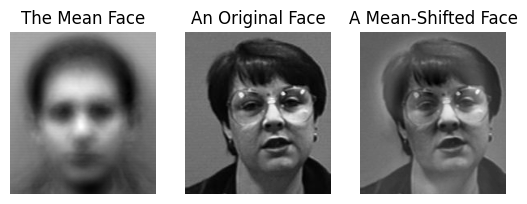

In [41]:
#Plots the mean face
plt.subplot(131)
plt.title('The Mean Face')
show(face.mu)

#Plots an original face
plt.subplot(132)
plt.title('An Original Face')
show(face.F[:,0])

#Plots a mean-shifted face
plt.subplot(133)
plt.title('A Mean-Shifted Face')
show(face.Fbar[:,0])

### Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


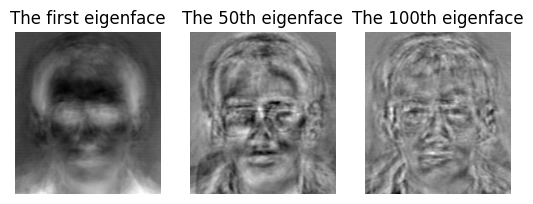

In [50]:
#Plots the first eigenface
plt.subplot(131)
plt.title('The first eigenface')
show(face.U[:,0])

#Plots the 50th eigenface
plt.subplot(132)
plt.title('The 50th eigenface')
show(face.U[:,50])

#Plots the 100th eigenface
plt.subplot(133)
plt.title('The 100th eigenface')
show(face.U[:,100])

### Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

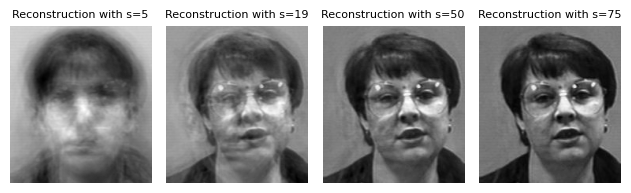

In [49]:
#Plot A Reconstruction with s=5
plt.subplot(141)
show(face.U[:,:5] @ face.project(face.Fbar[:,0], 5) + face.mu)
plt.title('Reconstruction with s=5', fontsize=8)

#Plot A Reconstruction with s=19
plt.subplot(142)
show(face.U[:,:19] @ face.project(face.Fbar[:,0], 19) + face.mu)
plt.title('Reconstruction with s=19', fontsize=8)

#Plot A Reconstruction with s=50
plt.subplot(143)
show(face.U[:,:50] @ face.project(face.Fbar[:,0], 50) + face.mu)
plt.title('Reconstruction with s=50', fontsize=8)

#Plot A Reconstruction with s=75
plt.subplot(144)
show(face.U[:,:75] @ face.project(face.Fbar[:,0], 75) + face.mu)
plt.title('Reconstruction with s=75', fontsize=8)
plt.tight_layout()


### Problem 5 
Implement `FacialRec.find_nearest()`.

### Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

C:\Users\tmntn\AppData\Local\Temp\ipykernel_10636\1106870313.py:46: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  yield np.ravel(imread(fname, as_gray=True))


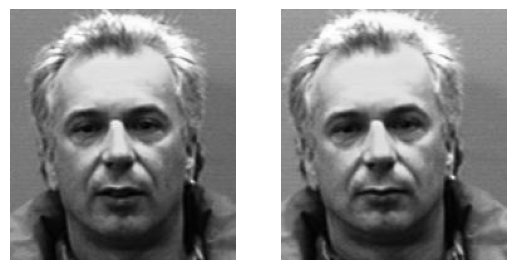

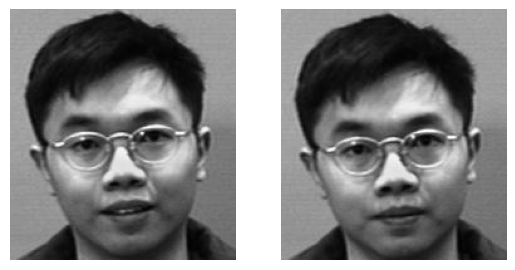

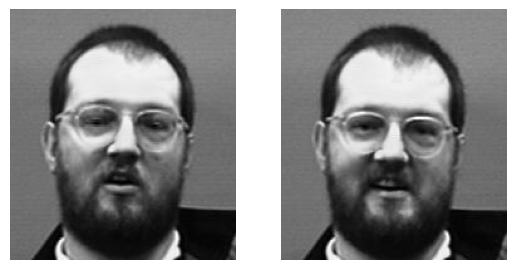

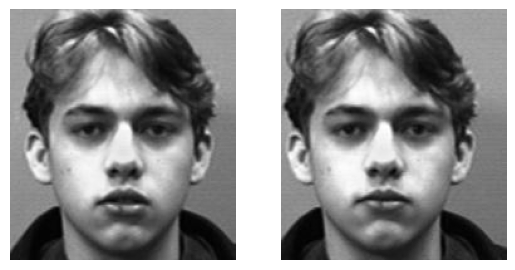

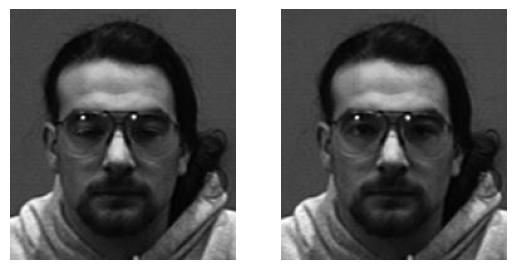

In [93]:
#Finds a random face and finds the match
for test_image in sample_faces(5):
    face.match(test_image)